# Hyperparameter Tuning
(Tevfik Aytekin)

Machine learning algorithms generally have parameters which effect the performance of the algorithm. In order to get the best performance one needs to find the best parameters values. The general approach for finding the best values is to form a hyperparameter grid and try all possible combinations.

#### K-NN

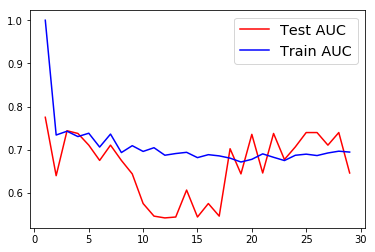

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import roc_curve, auc

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ['age', 'gender', 'cp', 'trestbps', 'chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','diagnosis']
heart = pd.read_csv(url, names=names, na_values=["?"])

X = heart.iloc[:,0:12]
y = heart.iloc[:,13]
y = y.replace([1,2,3,4],[1,1,1,1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

neighbors = list(range(1,30))
train_errors = []
test_errors = []
for i in neighbors:
    clf = KNeighborsClassifier(n_neighbors=i)  
    clf.fit(X_train, y_train);

    y_pred = clf.predict(X_train)  
    fpr, tpr, th = roc_curve(y_train, y_pred)
    auc_score = auc(fpr, tpr)
    train_errors.append(auc_score)
   
    y_pred = clf.predict(X_test)
    fpr, tpr, th = roc_curve(y_test, y_pred)
    auc_score = auc(fpr, tpr)
    test_errors.append(auc_score)

fig, ax = plt.subplots()
ax.plot(neighbors, test_errors, 'r', label='Test AUC')
ax.plot(neighbors, train_errors, 'b', label='Train AUC')
legend = ax.legend(loc='upper right', fontsize='x-large')


In [20]:
fpr

array([0.  , 0.25, 1.  ])

In [21]:
tpr

array([0. , 0.8, 1. ])

In [22]:
    auc = auc(fpr, tpr)


TypeError: 'numpy.float64' object is not callable